In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Getting Dataset

In [3]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = True, transform = transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = False, transform = transforms.Compose([transforms.ToTensor()]))

BATCH_SIZE = 128

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [4]:
from utils import train_loop, test_loop
from models import CNN_kernel_check
import pickle
import os

kernel_list = [7]

num_epochs = 20
lr = 0.001

for x in kernel_list:
    print('For kernel : {}'.format(x))
    model = CNN_kernel_check(kernel_size = x)
    model.to(device= device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = lr)

    tr_acc, te_acc = [], []
    tr_loss, te_loss = [], []

    best_acc = 0

    for epoch in range(num_epochs):
        train_loss, train_correct = train_loop(train_loader, model, loss_fn, optimizer, device)
        test_loss, test_correct = test_loop(test_loader, model, loss_fn, device)

        print('Train Acc epoch {} : {} '.format(epoch, train_correct))
        print('Test Acc epoch {} : {} '.format(epoch, test_correct))

        tr_acc.append(train_correct)
        te_acc.append(test_correct)

        tr_loss.append(train_loss)
        te_loss.append(test_loss)

    file_name = 'baseline_CNN_kernel_{}.pkl'.format(x) 

    with open(os.getcwd() + '/results/' + file_name, 'wb') as file:
        pickle.dump(tr_acc, file)
        pickle.dump(te_acc, file)
        pickle.dump(tr_loss, file)
        pickle.dump(te_loss, file)

    print("Best Acc : {} | Best Epoch : {}".format(max(te_acc), te_acc.index(max(te_acc))))

For kernel : 7


c:\Users\ianch\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Acc epoch 0 : 0.84045 
Test Acc epoch 0 : 0.8734 
Train Acc epoch 1 : 0.88855 
Test Acc epoch 1 : 0.8868 
Train Acc epoch 2 : 0.90345 
Test Acc epoch 2 : 0.887 
Train Acc epoch 3 : 0.9138666666666667 
Test Acc epoch 3 : 0.8842 
Train Acc epoch 4 : 0.9233666666666667 
Test Acc epoch 4 : 0.8911 
Train Acc epoch 5 : 0.9297333333333333 
Test Acc epoch 5 : 0.8912 
Train Acc epoch 6 : 0.93555 
Test Acc epoch 6 : 0.8965 
Train Acc epoch 7 : 0.9421333333333334 
Test Acc epoch 7 : 0.8928 
Train Acc epoch 8 : 0.9483666666666667 
Test Acc epoch 8 : 0.8935 
Train Acc epoch 9 : 0.9519833333333333 
Test Acc epoch 9 : 0.8918 
Train Acc epoch 10 : 0.9539666666666666 
Test Acc epoch 10 : 0.886 
Train Acc epoch 11 : 0.95335 
Test Acc epoch 11 : 0.8944 
Train Acc epoch 12 : 0.9557 
Test Acc epoch 12 : 0.8898 
Train Acc epoch 13 : 0.9612166666666667 
Test Acc epoch 13 : 0.8881 
Train Acc epoch 14 : 0.9673166666666667 
Test Acc epoch 14 : 0.8928 
Train Acc epoch 15 : 0.9709 
Test Acc epoch 15 : 0.895

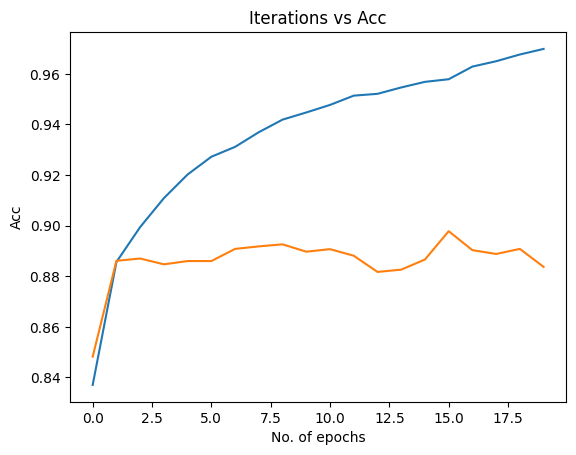

In [5]:
plt.plot(range(num_epochs), tr_acc)
plt.plot(range(num_epochs), te_acc)
plt.xlabel("No. of epochs")
plt.ylabel("Acc")
plt.title("Iterations vs Acc")
plt.show()

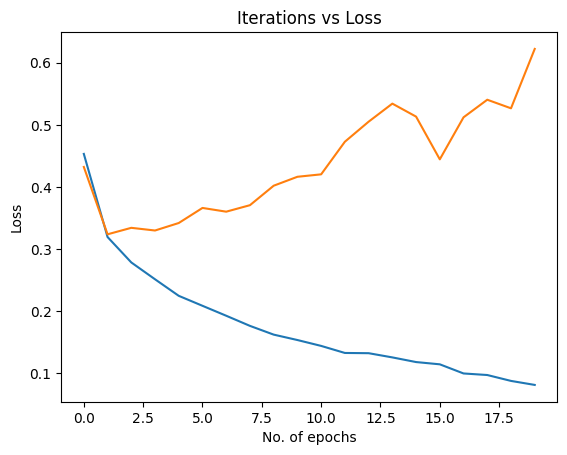

In [6]:
plt.plot(range(num_epochs), tr_loss)
plt.plot(range(num_epochs), te_loss)
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

In [15]:
print("Best Acc : {} | Best Epoch : {}".format(max(te_acc), te_acc.index(max(te_acc))))

Best Acc : 0.9066 | Best Epoch : 8


## Pickle out results and accuracies

In [19]:
import pickle
import os

file_name = 'baseline_CNN.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'wb') as file:
    pickle.dump(tr_acc, file)
    pickle.dump(te_acc, file)
    pickle.dump(tr_loss, file)
    pickle.dump(te_loss, file)

## Pickle in results and accuracies

In [21]:
file_name = 'baseline_CNN.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'rb') as file:
    tr_acc = pickle.load(file)
    te_acc = pickle.load(file)
    tr_loss = pickle.load(file)
    te_loss = pickle.load(file)


print(tr_acc)
print(te_acc)
print(tr_loss)
print(te_loss)

[0.8457333333333333, 0.8920833333333333, 0.9039666666666667, 0.9146666666666666, 0.9222666666666667, 0.9263166666666667, 0.9320833333333334, 0.9362833333333334, 0.9403833333333333, 0.9440833333333334, 0.9477833333333333, 0.9496166666666667, 0.9519833333333333, 0.9556833333333333, 0.9568666666666666, 0.9581333333333333, 0.9594166666666667, 0.96075, 0.9625833333333333, 0.9638333333333333]
[0.8601, 0.8755, 0.891, 0.904, 0.9026, 0.9012, 0.9035, 0.9049, 0.9066, 0.9056, 0.8996, 0.9013, 0.8972, 0.8967, 0.8975, 0.8933, 0.8958, 0.8947, 0.8941, 0.8819]
[0.4357489900929587, 0.3019022142518558, 0.2678435962083243, 0.24056633077323564, 0.21899496069722085, 0.20378791980906083, 0.18782627019387826, 0.1759960425973955, 0.16525319283768566, 0.1545840719980853, 0.1451213597965393, 0.13864999555988605, 0.12982593746835996, 0.12251129968445311, 0.11824226782504302, 0.11515209018818733, 0.11056489282563678, 0.10758647995033879, 0.103664388300291, 0.1008517388730987]
[0.3988858495332018, 0.352926621142822,